In [1]:
#clustering method -DBSCAN

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('customer_data.csv')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/12,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/14,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/13,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/14,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/14,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.shape

(2240, 29)

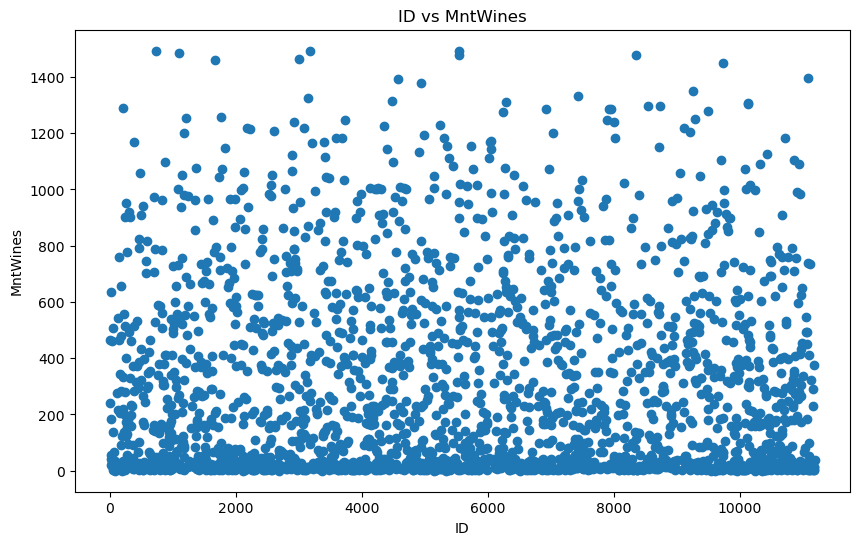

In [7]:
plt.figure(figsize = (10,6))
plt.scatter(df['ID'],df['MntWines'])
plt.xlabel('ID')
plt.ylabel('MntWines')
plt.title("ID vs MntWines")
plt.show()

In [8]:
X = df.iloc[:,[3,4]].values
X.shape

(2240, 2)

In [9]:
X[:5]


array([['Single', 58138.0],
       ['Single', 46344.0],
       ['Together', 71613.0],
       ['Together', 26646.0],
       ['Married', 58293.0]], dtype=object)

In [23]:
from itertools import product
eps_values = np.arange(8,13,0.25)
min_samples = np.arange(3,9)
dbscan_params = list(product(eps_values,min_samples))


In [26]:
# sigle value of eps, minpoint
from sklearn.cluster import DBSCAN
X_numeric_feature = df[['ID','NumWebPurchases','NumWebVisitsMonth']]
dbs_cluster_single = DBSCAN(eps=9,min_samples=8).fit(X_numeric_feature)
dbs_cluster_single.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [27]:
np.unique(dbs_cluster_single.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

In [28]:
len(np.unique(dbs_cluster_single.labels_))

17

In [29]:
from sklearn.metrics import silhouette_score
silhouette_score(X_numeric_feature,dbs_cluster_single.labels_)

-0.8075516865789362

In [31]:
from sklearn.metrics import silhouette_score
X_numeric_feature = df[['ID','NumWebPurchases','NumWebVisitsMonth']]
sil_score = []
no_of_clusters = []
for k in dbscan_params:
 dbs_cluster = DBSCAN(eps=k[0],min_samples=k[1]).fit(X_numeric_feature)
 no_of_clusters.append(len(np.unique(dbs_cluster.labels_)))
 sil_score.append(silhouette_score(X_numeric_feature,dbs_cluster.labels_))

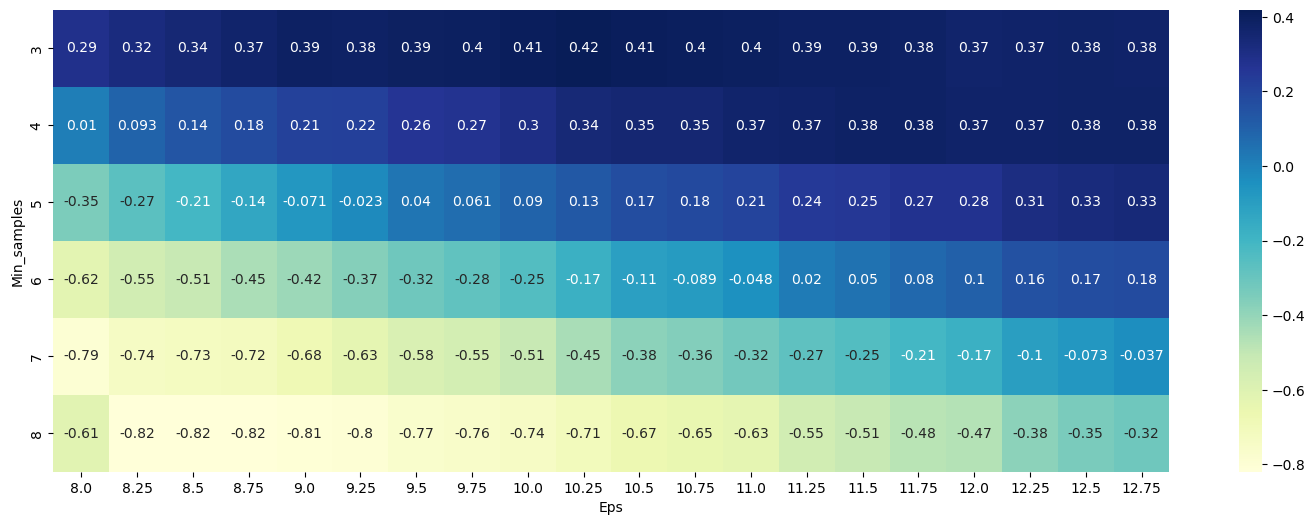

In [32]:
import seaborn as sns
temp = pd.DataFrame.from_records(dbscan_params,columns = ['Eps','Min_samples'])
temp['sil_score'] = sil_score
plt.figure(figsize=(18,6))
pivot = pd.pivot_table(temp,values = 'sil_score',index = 'Min_samples',columns = 'Eps')
sns.heatmap(pivot,annot = True, cmap = 'YlGnBu')
plt.show()

In [33]:
dbs_cluster_final = DBSCAN(eps=12.75,min_samples=4).fit(X_numeric_feature)

In [34]:
dbs_clustered = X_numeric_feature.copy()
dbs_clustered.loc[:,'cluster'] = dbs_cluster_final.labels_
dbs_clustered

,ID,NumWebPurchases,NumWebVisitsMonth,cluster
0,5524,8,7,0
1,2174,1,5,1
2,4141,8,4,2
3,6182,2,6,3
4,5324,5,5,4
...,...,...,...,...
2235,10870,9,5,70
2236,4001,8,7,142
2237,7270,2,6,31
2238,8235,6,3,114


In [35]:
dbs_cluster_size = dbs_clustered.groupby('cluster').size().to_frame()
dbs_cluster_size.columns = ['dbs_size']
dbs_cluster_size

,dbs_size
cluster,
-1,137
0,20
1,23
2,33
3,7
...,...
158,5
159,4
160,3


In [37]:
outliers = dbs_clustered[dbs_clustered['cluster']==-1]
outliers

,ID,NumWebPurchases,NumWebVisitsMonth,cluster
9,5899,1,20,-1
27,5255,27,1,-1
90,8996,7,9,-1
131,433,11,8,-1
133,1295,6,4,-1
...,...,...,...,...
2066,6103,2,4,-1
2120,8832,3,7,-1
2123,4915,5,5,-1
2199,9014,3,8,-1
